**Capstone** Project code

In [ ]:
# import the packages used in the project
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_json('pokemon_updated_2.json', orient = 'index')
df = df[pd.isnull(df['forme'])] # Takes out special forms

In [ ]:
# Load attributes from water type into a dataframe
water = df[df['types'].apply(lambda x: "Water" in x)]
avg = 0
stats = []
statname = ['hp', 'atk', 'def', 'spa', 'spd', 'spe']
for stat in statname: # Iterate through the basestats
  for j in range(water.shape[0]):
    avg += water["baseStats"][j][stat] # Add the stat for each water pokemon
  avg /= water.shape[0] # Divide by number of water pokemon
  stats.append(avg)
stats # Print out list of water type's average stats

[69.59740259740259,
 72.54284027660651,
 72.7113171446533,
 71.46565790353672,
 69.09393284352946,
 66.00710346002293]

In [ ]:
#List of base stats for each generation
gen1 = []
gen2 = []
gen3 = []
gen4 = []
gen5 = []
gen6 = []
gen7 = []
gen8 = []
gen9 = []

# Using the Pokemon's National Dex Number, we can seperate them by generation
for i in range(len(df)):
    if df["num"][i] <= 151:
        gen1.append(df["baseStats"][i])
    elif 152 <= df["num"][i] <= 251:
        gen2.append(df["baseStats"][i])
    elif 252 <= df["num"][i] <= 386:
        gen3.append(df["baseStats"][i])
    elif 387 <= df["num"][i] <= 493:
        gen4.append(df["baseStats"][i])
    elif 494 <= df["num"][i] <= 649:
        gen5.append(df["baseStats"][i])
    elif 650 <= df["num"][i] <= 721:
        gen6.append(df["baseStats"][i])
    elif 722 <= df["num"][i] <= 809:
        gen7.append(df["baseStats"][i])
    elif 810 <= df["num"][i] <= 905:
        gen8.append(df["baseStats"][i])
    elif df["num"][i] >= 906:
        gen9.append(df["baseStats"][i])

# Sums the values of each individual Pokemon's base stats, then sums again to
# get the total stats for all Pokemon in the generation.
gen1_bs_avg = round(sum([sum(stats.values()) for stats in gen1]) / len(gen1), 2)
gen2_bs_avg = round(sum([sum(stats.values()) for stats in gen2]) / len(gen2), 2)
gen3_bs_avg = round(sum([sum(stats.values()) for stats in gen3]) / len(gen3), 2)
gen4_bs_avg = round(sum([sum(stats.values()) for stats in gen4]) / len(gen4), 2)
gen5_bs_avg = round(sum([sum(stats.values()) for stats in gen5]) / len(gen5), 2)
gen6_bs_avg = round(sum([sum(stats.values()) for stats in gen6]) / len(gen6), 2)
gen7_bs_avg = round(sum([sum(stats.values()) for stats in gen7]) / len(gen7), 2)
gen8_bs_avg = round(sum([sum(stats.values()) for stats in gen8]) / len(gen8), 2)
gen9_bs_avg = round(sum([sum(stats.values()) for stats in gen9]) / len(gen9), 2)

In [ ]:
# Makes a list of the Pokemon types from the DataFrame
types = []
for pokemon_types in df["types"]:
    for type in pokemon_types:
        if type not in types:
            types.append(type)

# Makes a list of the base stats we will read
stats = ["hp", "atk", "def", "spa", "spd", "spe"]

# Makes a dictionary to store stats for each type, all types
stat_avgs_by_type = {}
for stat in stats:
    stat_avgs_by_type[stat] = {}

# Goes through each state and calculatse the average
for stat in stats:
    # Dictionary for stats for each type, a single type
    stat_by_type = {}
    for pokemon_type in types:
        stat_by_type[pokemon_type] = []
    # Gets stats from each Pokemon
    for i in range(len(df)):
        for j in df["types"][i]:
            stat_by_type[j].append(df["baseStats"][i][stat])
    # Calculates average
    for i in types:
        stat_avgs_by_type[stat][i] = round(sum(stat_by_type[i]) / len(stat_by_type[i]), 2)

# Sort average base stats by name
for stat in stat_avgs_by_type:
    stat_sorted_values = sorted(stat_avgs_by_type[stat].values())
    stat_sorted = {}
    for i in stat_sorted_values:
        for k in stat_avgs_by_type[stat].keys():
            if stat_avgs_by_type[stat][k] == i:
                stat_sorted[k] = stat_avgs_by_type[stat][k]

# Sort by stat average in new dictionary
avgs_sorted = {key : dict(sorted(val.items(), key = lambda ele: ele[1]))
       for key, val in stat_avgs_by_type.items()}

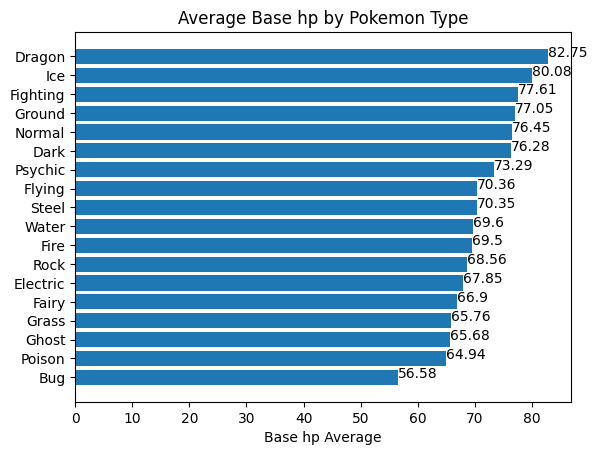

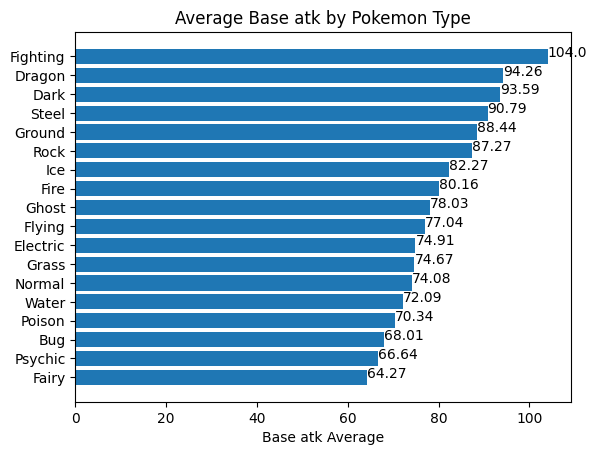

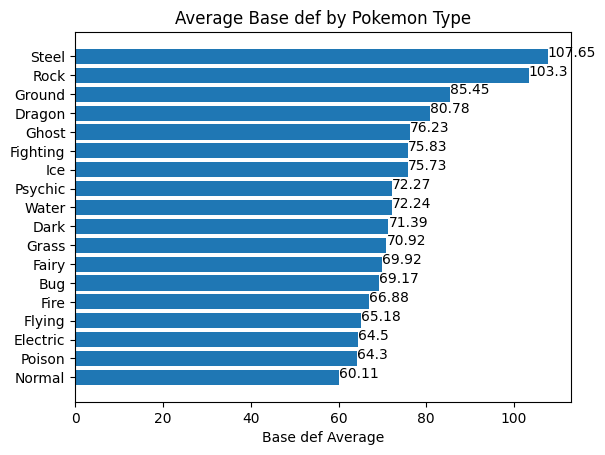

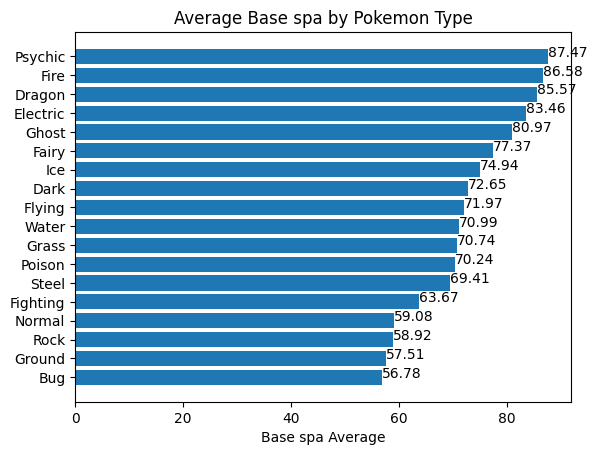

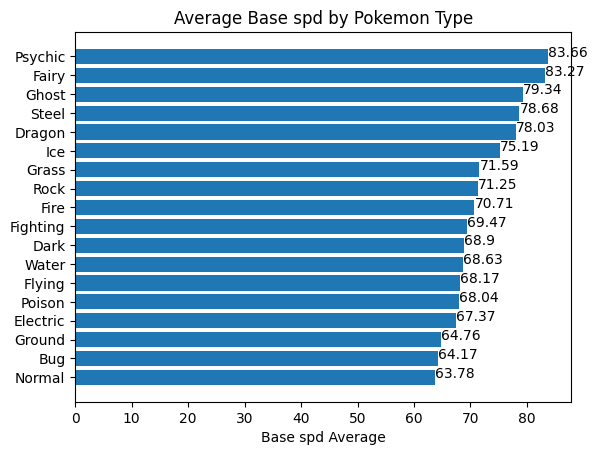

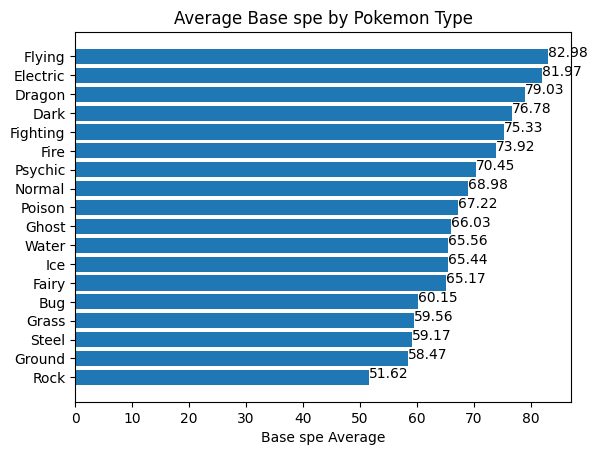

In [ ]:
# Makes a bar graph for each individual stat
for stat in stats:
    window, stat_axis = plt.subplots()
    # Makes horizontal bar graph to fit all types
    stat_axis.barh(range(len(avgs_sorted[stat])), avgs_sorted[stat].values())
    stat_axis.set_yticks(range(len(avgs_sorted[stat])))
    stat_axis.set_yticklabels(avgs_sorted[stat].keys())
    stat_axis.set_xlabel('Base ' + stat + ' Average')
    stat_axis.set_title('Average Base ' + stat + ' by Pokemon Type')
    # Adds value labels to each bar
    for index, value in enumerate(avgs_sorted[stat].values()):
        stat_axis.text(value, index, str(value), color='black')
    plt.show()

In [ ]:
gen1_special = 0
gen2_special = 0
gen3_special = 0
gen4_special = 0
gen5_special = 0
gen6_special = 0
gen7_special = 0
gen8_special = 0
gen9_special = 0

# If the "tags" attribute (which is responsible for classifying "Special Pokemon")
# does not contain a float value (NaN), add to the variable
for i in range(len(df)):
    if isinstance(df["tags"][i], float) == False:
        if df["num"][i] <= 151:
            gen1_special += 1
        elif 152 <= df["num"][i] <= 251:
            gen2_special += 1
        elif 252 <= df["num"][i] <= 386:
            gen3_special += 1
        elif 387 <= df["num"][i] <= 493:
            gen4_special += 1
        elif 494 <= df["num"][i] <= 649:
            gen5_special += 1
        elif 650 <= df["num"][i] <= 721:
            gen6_special += 1
        elif 722 <= df["num"][i] <= 809:
            gen7_special += 1
        elif 810 <= df["num"][i] <= 905:
            gen8_special += 1
        elif df["num"][i] >= 906:
            gen9_special += 1

# Dividing by the number of Pokemon introduced in that Generation, in order to get a ratio
gen1_special_ratio = gen1_special / 151
gen2_special_ratio = gen2_special / 100
gen3_special_ratio = gen3_special / 135
gen4_special_ratio = gen4_special / 107
gen5_special_ratio = gen5_special / 156
gen6_special_ratio = gen6_special / 72
gen7_special_ratio = gen7_special / 88
gen8_special_ratio = gen8_special / 96
gen9_special_ratio = gen9_special / 105

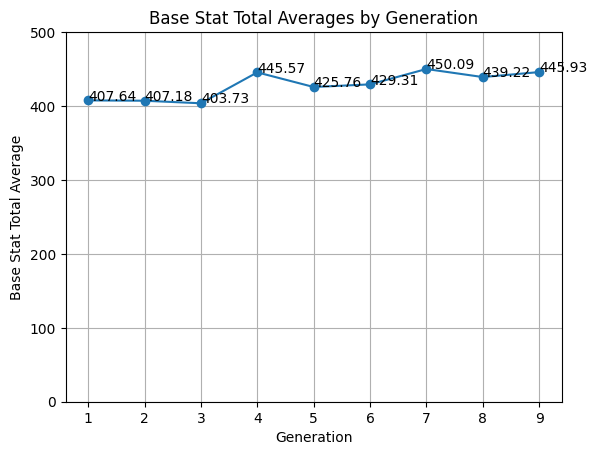

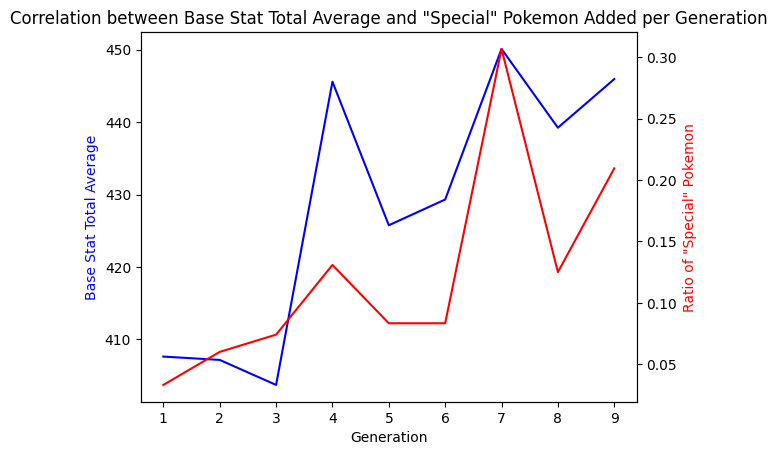

In [ ]:
# Graphing the stats
generation = [1, 2, 3, 4, 5, 6, 7, 8, 9]
bs_avg = [gen1_bs_avg, gen2_bs_avg, gen3_bs_avg, gen4_bs_avg, gen5_bs_avg, gen6_bs_avg, gen7_bs_avg, gen8_bs_avg, gen9_bs_avg]
pokemon_ratio = [gen1_special_ratio, gen2_special_ratio, gen3_special_ratio, gen4_special_ratio, gen5_special_ratio, gen6_special_ratio, gen7_special_ratio, gen8_special_ratio, gen9_special_ratio]
plt.plot(generation, bs_avg, marker = 'o')
plt.title("Base Stat Total Averages by Generation")
plt.xlabel("Generation")
plt.ylabel("Base Stat Total Average")
plt.xticks(generation, generation)
for index, value in enumerate(bs_avg):
    plt.text(generation[index], value, str(value))
plt.ylim(bottom=0, top=500)
plt.grid()
plt.show()


graph, x1 = plt.subplots()

x2 = x1.twinx()
x1.plot(generation, bs_avg, "b")
x2.plot(generation, pokemon_ratio, "r")

x1.set_xlabel("Generation")
x1.set_ylabel("Base Stat Total Average", color = "b")
x2.set_ylabel("Ratio of \"Special\" Pokemon", color ="r")

plt.title("Correlation between Base Stat Total Average and \"Special\" Pokemon Added per Generation")
plt.show()

# "Special" Pokemon include Legendary, Mythical, Ultra Beasts, and Paradox Pokemon,
# which typically have very high base stats. This graph shows the correlation between
# Base Stat Total Average and "Special" Pokemon added. The sharp spike in Generation 4
# without the addition of many "Special" Pokemon is because 22/107 new Pokemon added in
# Generation 4 were evolved forms of previous Generations' Pokemon. For example,
# Electivire, Magmortar, and Togekiss are evolved forms of Electabuzz, Magmar, and Togetic,
# all introduced in previous Generations. You can see that the two graphs increase and
# decrease similarly as time passes.

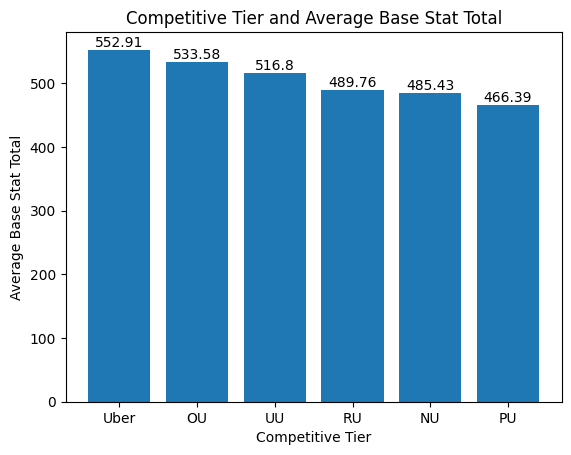

In [ ]:
# Makes a new DataFrame for using the "tier" column of our original DataFrame
illegal_df = df[df["tier"].apply(lambda x: "Illegal" in x)]
uber_df = df[df["tier"].apply(lambda x: "Uber" in x)]
ou_df = df[df["tier"].apply(lambda x: "OU" in x)]
uu_df = df[df["tier"].apply(lambda x: "UU" in x)]
ru_df = df[df["tier"].apply(lambda x: "RU" in x)]
nu_df = df[df["tier"].apply(lambda x: "NU" in x)]
pu_df = df[df["tier"].apply(lambda x: "PU" in x)]

# Calculates the Base Stat Total Average for each tier
uber_avg = round(sum([sum(stats.values()) for stats in uber_df["baseStats"]]) / len(uber_df), 2)
ou_avg = round(sum([sum(stats.values()) for stats in ou_df["baseStats"]]) / len(ou_df), 2)
uu_avg = round(sum([sum(stats.values()) for stats in uu_df["baseStats"]]) / len(uu_df), 2)
ru_avg = round(sum([sum(stats.values()) for stats in ru_df["baseStats"]]) / len(ru_df), 2)
nu_avg = round(sum([sum(stats.values()) for stats in nu_df["baseStats"]]) / len(nu_df), 2)
pu_avg = round(sum([sum(stats.values()) for stats in pu_df["baseStats"]]) / len(pu_df), 2)

tier = ["Uber", "OU", "UU", "RU", "NU", "PU"]
tier_avg = [uber_avg, ou_avg, uu_avg, ru_avg, nu_avg, pu_avg]

# Graphs the values
plt.bar(tier, tier_avg)
plt.title("Competitive Tier and Average Base Stat Total")
plt.xlabel("Competitive Tier")
plt.ylabel("Average Base Stat Total")
for index, value in enumerate(tier_avg):
    plt.bar_label(plt.bar(tier[index], value, color="tab:blue"), label=value)
plt.show()